In [93]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import csv
import math
import sklearn

plt.rcParams['font.size'] = 14

In [94]:
def read_data():
    data = []
    with open('train.csv') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader) # take the header out
        for row in reader: # each row is a list
            data.append(row)
    data  = np.array(data, dtype = np.float)
    X = data[:,:-1]
    Y = data[:,-1]
    return X, Y
X, Y = read_data()

In [95]:
def create_weights(G,C,X,Y):
    n = len(X)
    K = np.zeros((n,n))
    for i in range(120):
        for j in range(120):
            K[i][j]=Y[i]*Y[j]*math.exp(-1*G*(sum(x**2 for x in (X[i]-X[j]))))
    I = np.identity(120)
    BR = I/C + K
    Y = Y.reshape((120,1))
    B = np.hstack([Y,BR])
    TR = Y.reshape((1,120))
    T = np.hstack([np.zeros((1,1)),TR])
    M = np.vstack([T,B])
    rT = np.zeros((1,1))
    rB = np.ones((120,1))
    result = np.vstack([rT,rB])
    x = np.linalg.solve(M, result)
    return x[0],x[1:]

In [96]:
userG = 1
userC = 1
b,a = create_weights(userG,userC,X,Y)

In [97]:
def pred(x,G,a,b):
    ret = 0
    ret += b
    for i in range(120):
        k = math.exp(-1*G*(sum(x**2 for x in (x-X[i]))))
        ret += a[i]*Y[i]*k
    if ret > 0:
        return 1
    else:
        return -1

In [98]:
def error(p,q,G,a,b):
    counter = 0
    for i in range(len(p)):
        if pred(p[i],G,a,b)!=q[i]:
            counter+=1
    return counter

In [99]:
error(X,Y,userG,a,b)

3

In [100]:
def read_test_data():
    data = []
    with open('test.csv') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader) # take the header out
        for row in reader: # each row is a list
            data.append(row)
    data  = np.array(data, dtype = np.float)
    X = data[:,:-1]
    Y = data[:,-1]
    return X, Y
XT, YT = read_test_data()

In [101]:
error(XT,YT,userG,a,b)

3

In [62]:
from sklearn.svm import SVC

def svcour(c,g):
    b,a = create_weights(g,c,X,Y)
    ret1 = error(X,Y,g,a,b)/120.0
    ret2 = error(XT,YT,g,a,b)/80.0
    return ret1, ret2

def svcrbf(c,g):
    clf = SVC(C=c, kernel='rbf',gamma=g)
    clf.fit(X, Y) 
    count = 0
    pred = clf.predict(X)
    for i in range(len(X)):
        if pred[i]!=Y[i]:
            count+=1
    ret1 = count/120.0
    count = 0
    pred = clf.predict(XT)
    for i in range(len(XT)):
        if pred[i]!=YT[i]:
            count+=1
    ret2 = count/80.0
    return ret1, ret2
    
def svclin(c,g):
    clf = SVC(C=c, kernel='linear',gamma=g)
    clf.fit(X, Y) 
    count = 0
    pred = clf.predict(X)
    for i in range(len(X)):
        if pred[i]!=Y[i]:
            count+=1
    ret1 = count/120.0
    count = 0
    pred = clf.predict(XT)
    for i in range(len(XT)):
        if pred[i]!=YT[i]:
            count+=1
    ret2 = count/80.0
    return ret1, ret2
    
def svcpoly(c,g):
    clf = SVC(C=c, kernel='poly',gamma=g)
    clf.fit(X, Y) 
    count = 0
    pred = clf.predict(X)
    for i in range(len(X)):
        if pred[i]!=Y[i]:
            count+=1
    ret1 = count/120.0
    count = 0
    pred = clf.predict(XT)
    for i in range(len(XT)):
        if pred[i]!=YT[i]:
            count+=1
    ret2 = count/80.0
    return ret1, ret2
    
def svcsig(c,g):
    clf = SVC(C=c, kernel='sigmoid',gamma=g)
    clf.fit(X, Y) 
    count = 0
    pred = clf.predict(X)
    for i in range(len(X)):
        if pred[i]!=Y[i]:
            count+=1
    ret1 = count/120.0
    count = 0
    pred = clf.predict(XT)
    for i in range(len(XT)):
        if pred[i]!=YT[i]:
            count+=1
    ret2 = count/80.0
    return ret1, ret2

In [63]:
ret = [[],[],[],[],[],[],[],[],[],[]]
values = [0.01,0.05,0.1,0.5,1,5,10,50,100]

In [64]:
def play(c,g):
    a, b = svcour(c,g)
    ret[0].append(a)
    ret[1].append(b)
    a, b = svcrbf(c,g)
    ret[2].append(a)
    ret[3].append(b)
    a, b = svclin(c,g)
    ret[4].append(a)
    ret[5].append(b)
    a, b = svcpoly(c,g)
    ret[6].append(a)
    ret[7].append(b)
    a, b = svcsig(c,g)
    ret[8].append(a)
    ret[9].append(b)

In [65]:
for i in range(len(values)):
    play(1,values[i])

In [66]:
print(len(ret[0]))

9


In [67]:
print('Training errors')
for i in range(len(ret)):
    if i % 2 == 0:
        print(ret[i])
print()
print('Testing errors')
for i in range(len(ret)):
    if i % 2 == 1:
        print(ret[i])

Training errors
[0.175, 0.175, 0.15, 0.058333333333333334, 0.025, 0.0, 0.0, 0.0, 0.0]
[0.175, 0.175, 0.15833333333333333, 0.06666666666666667, 0.03333333333333333, 0.0, 0.008333333333333333, 0.0, 0.0]
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.45, 0.45, 0.225, 0.15, 0.15833333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.16666666666666666, 0.18333333333333332, 0.175, 0.2916666666666667, 0.38333333333333336, 0.2833333333333333, 0.3, 0.3, 0.3]

Testing errors
[0.1375, 0.1375, 0.1375, 0.0375, 0.0375, 0.05, 0.0625, 0.25, 0.35]
[0.1375, 0.1375, 0.1375, 0.0375, 0.0375, 0.05, 0.0625, 0.25, 0.3375]
[0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375]
[0.575, 0.575, 0.3, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375]
[0.15, 0.1375, 0.1375, 0.275, 0.425, 0.2375, 0.25, 0.2625, 

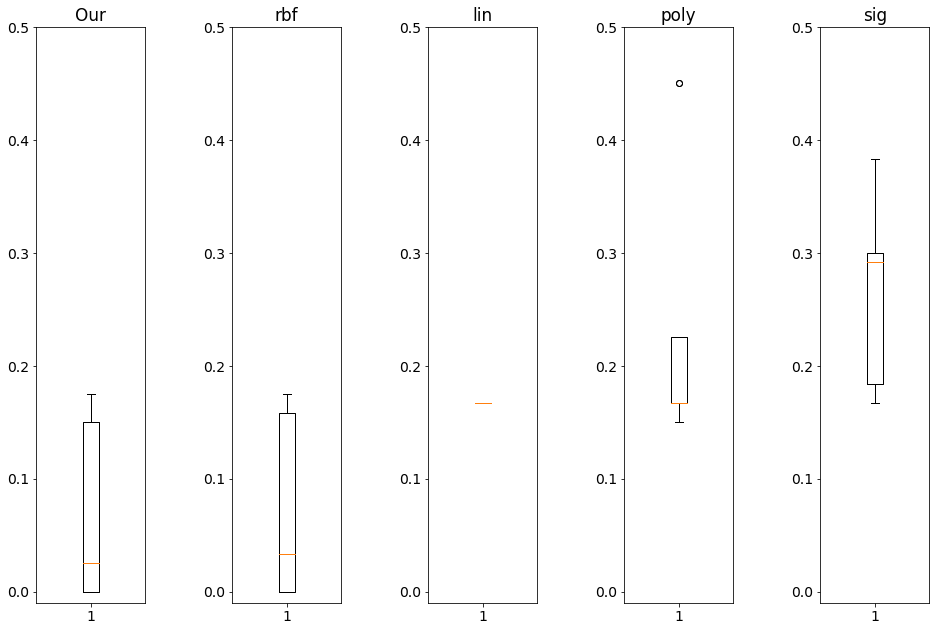

In [68]:
fig, axs = plt.subplots(1, 5)
axs[0].boxplot(ret[0])
axs[0].set_title('Our')
axs[0].set_ylim([-0.01,0.5])
axs[1].boxplot(ret[2])
axs[1].set_title('rbf')
axs[1].set_ylim([-0.01,0.5])
axs[2].boxplot(ret[4])
axs[2].set_title('lin')
axs[2].set_ylim([-0.01,0.5])
axs[3].boxplot(ret[6])
axs[3].set_title('poly')
axs[3].set_ylim([-0.01,0.5])
axs[4].boxplot(ret[8])
axs[4].set_title('sig')
axs[4].set_ylim([-0.01,0.5])
fig.subplots_adjust(left=0.125, right=0.9, bottom = 0.1, top = 0.9, wspace=0.8)

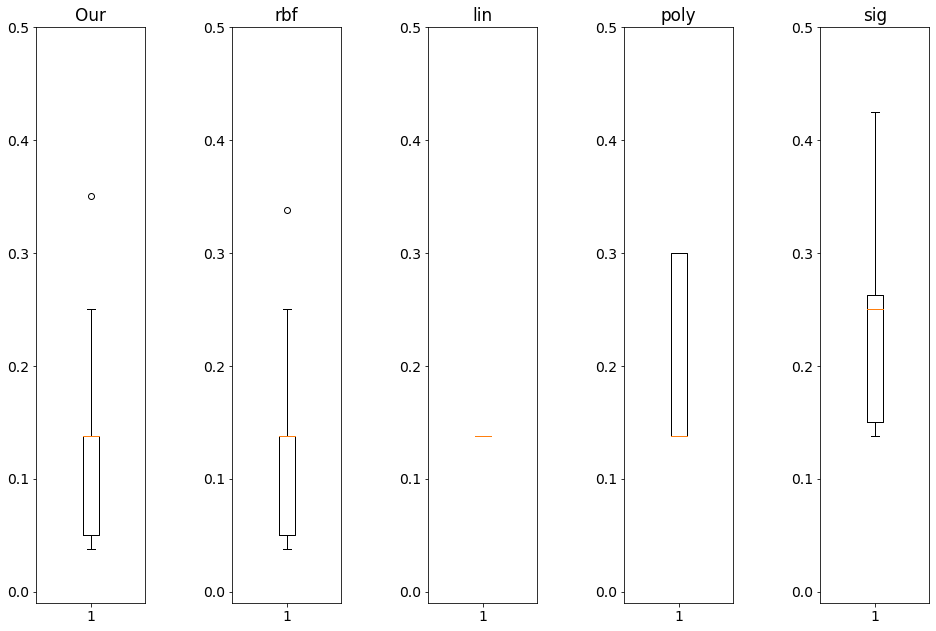

In [69]:
fig, axs = plt.subplots(1, 5)
axs[0].boxplot(ret[1])
axs[0].set_title('Our')
axs[0].set_ylim([-0.01,0.5])
axs[1].boxplot(ret[3])
axs[1].set_title('rbf')
axs[1].set_ylim([-0.01,0.5])
axs[2].boxplot(ret[5])
axs[2].set_title('lin')
axs[2].set_ylim([-0.01,0.5])
axs[3].boxplot(ret[7])
axs[3].set_title('poly')
axs[3].set_ylim([-0.01,0.5])
axs[4].boxplot(ret[9])
axs[4].set_title('sig')
axs[4].set_ylim([-0.01,0.5])
fig.subplots_adjust(left=0.125, right=0.9, bottom = 0.1, top = 0.9, wspace=0.8)

In [70]:
ret = [[],[],[],[],[],[],[],[],[],[]]

In [71]:
for i in range(len(values)):
    play(values[i],1)

In [72]:
print('Training errors')
for i in range(len(ret)):
    if i % 2 == 0:
        print(ret[i])
print()
print('Testing errors')
for i in range(len(ret)):
    if i % 2 == 1:
        print(ret[i])

Training errors
[0.15833333333333333, 0.075, 0.058333333333333334, 0.03333333333333333, 0.025, 0.008333333333333333, 0.008333333333333333, 0.0, 0.0]
[0.45, 0.125, 0.075, 0.05, 0.03333333333333333, 0.025, 0.008333333333333333, 0.0, 0.0]
[0.16666666666666666, 0.18333333333333332, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.175, 0.175, 0.175, 0.175]
[0.15, 0.15833333333333333, 0.15, 0.16666666666666666, 0.15833333333333333, 0.15833333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.18333333333333332, 0.23333333333333334, 0.24166666666666667, 0.3333333333333333, 0.38333333333333336, 0.38333333333333336, 0.375, 0.38333333333333336, 0.38333333333333336]

Testing errors
[0.15, 0.0625, 0.0375, 0.0375, 0.0375, 0.025, 0.0375, 0.05, 0.05]
[0.575, 0.0875, 0.05, 0.0375, 0.0375, 0.0375, 0.0375, 0.0625, 0.075]
[0.15, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375]
[0.175, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375, 0.1375]
[

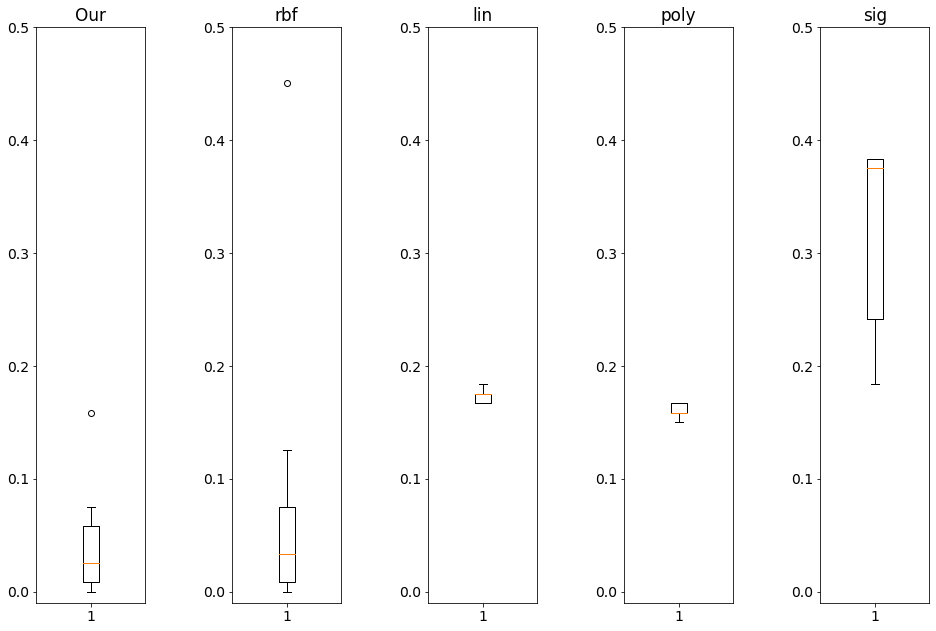

In [73]:
fig, axs = plt.subplots(1, 5)
axs[0].boxplot(ret[0])
axs[0].set_title('Our')
axs[0].set_ylim([-0.01,0.5])
axs[1].boxplot(ret[2])
axs[1].set_title('rbf')
axs[1].set_ylim([-0.01,0.5])
axs[2].boxplot(ret[4])
axs[2].set_title('lin')
axs[2].set_ylim([-0.01,0.5])
axs[3].boxplot(ret[6])
axs[3].set_title('poly')
axs[3].set_ylim([-0.01,0.5])
axs[4].boxplot(ret[8])
axs[4].set_title('sig')
axs[4].set_ylim([-0.01,0.5])
fig.subplots_adjust(left=0.125, right=0.9, bottom = 0.1, top = 0.9, wspace=0.8)

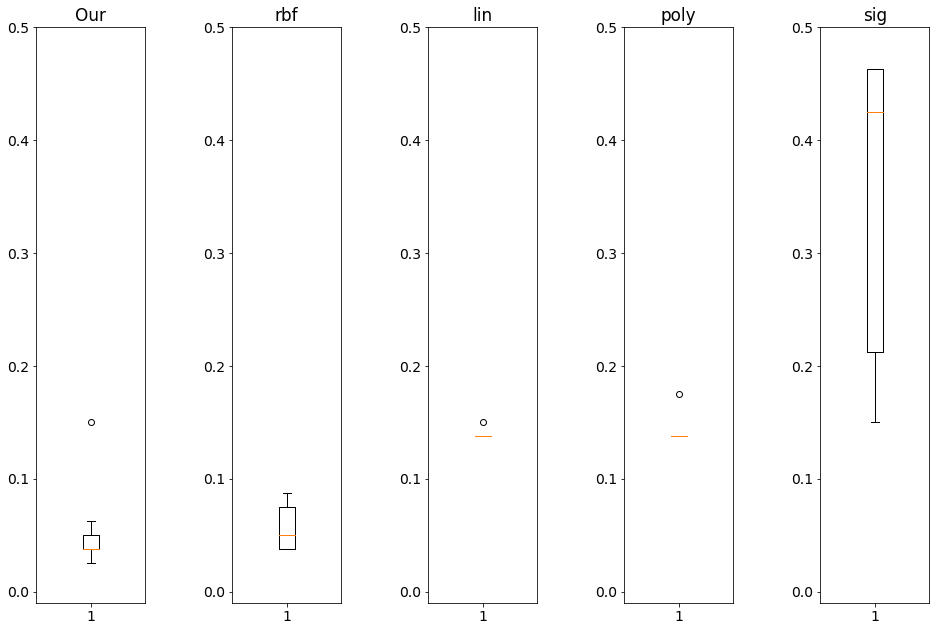

In [77]:
fig, axs = plt.subplots(1, 5)
axs[0].boxplot(ret[1])
axs[0].set_title('Our')
axs[0].set_ylim([-0.01,0.5])
axs[1].boxplot(ret[3])
axs[1].set_title('rbf')
axs[1].set_ylim([-0.01,0.5])
axs[2].boxplot(ret[5])
axs[2].set_title('lin')
axs[2].set_ylim([-0.01,0.5])
axs[3].boxplot(ret[7])
axs[3].set_title('poly')
axs[3].set_ylim([-0.01,0.5])
axs[4].boxplot(ret[9])
axs[4].set_title('sig')
axs[4].set_ylim([-0.01,0.5])
fig.subplots_adjust(left=0.125, right=0.9, bottom = 0.1, top = 0.9, wspace=0.8)

In [78]:
clf = SVC(C=1, kernel='rbf',gamma=1)
clf.fit(X, Y) 
pred = clf.predict(X)

In [79]:
blue = np.empty(shape=[0, 2])
bluespt = np.empty(shape=[0, 2])
red = np.empty(shape=[0, 2])
redspt = np.empty(shape=[0, 2])
support = clf.support_
for i in range(120):
    if Y[i]>0:
        if i in support:
            bluespt = np.append(bluespt,[X[i]],axis = 0)
        else:
            blue = np.append(blue,[X[i]],axis = 0)
    elif Y[i]<0:
        if i in support:
            redspt = np.append(redspt,[X[i]],axis = 0)
        else:
            red = np.append(red,[X[i]],axis = 0)

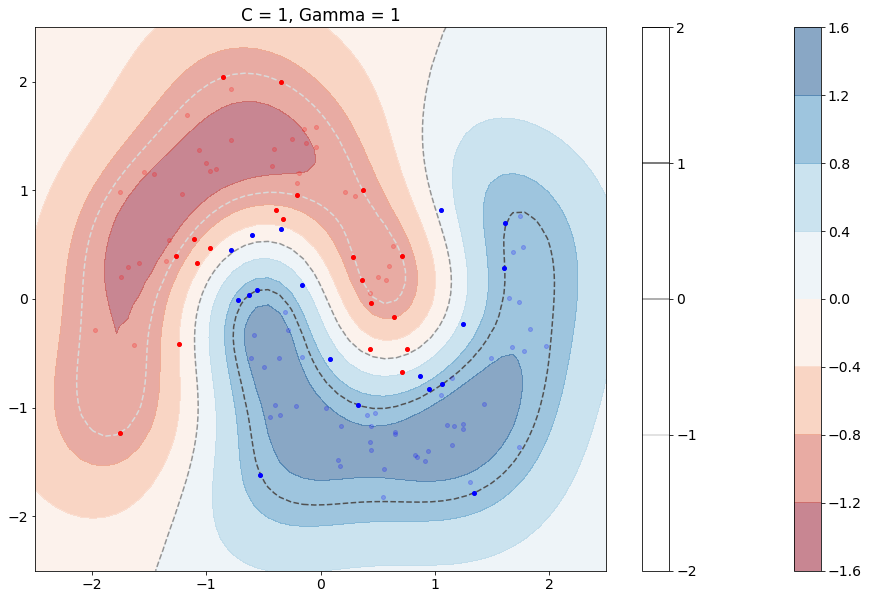

In [103]:
x = np.linspace(-2.5,2.5,50)
y = np.linspace(-2.5,2.5,50)
Z= np.zeros((len(x),len(y)))
for i in range(len(y)):
    for j in range(len(x)):
        Z[i][j]=clf.decision_function(np.array([[y[j],x[i]]]))
plt.rcParams['figure.figsize'] = [16, 10]
plt.contourf(x,y,Z,cmap='RdBu',alpha=0.5)
plt.colorbar()
plt.contour(x,y,Z,[-2,-1,0,1,2],cmap='Greys',linestyles='dashed')
plt.colorbar()
plt.plot(red[:,0], red[:,1], 'ro', alpha = 0.2, markersize = 4)
plt.plot(blue[:,0], blue[:,1], 'bo', alpha = 0.2, markersize = 4)
plt.plot(redspt[:,0], redspt[:,1], 'ro', alpha = 1, markersize = 4)
plt.plot(bluespt[:,0], bluespt[:,1], 'bo', alpha = 1, markersize = 4)
plt.title('C = 1, Gamma = 1')
plt.show()

In [81]:
def plotsvc(C,G):
    clf = SVC(C=C, kernel='rbf',gamma=G)
    clf.fit(X, Y) 
    pred = clf.predict(X)
    x = np.linspace(-2.5,2.5,50)
    y = np.linspace(-2.5,2.5,50)
    Z= np.zeros((len(x),len(y)))
    for i in range(len(y)):
        for j in range(len(x)):
            Z[i][j]=clf.decision_function(np.array([[y[j],x[i]]]))
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.contourf(x,y,Z,cmap='RdBu',alpha=0.5)
    plt.colorbar()
    plt.contour(x,y,Z,[-2,-1,0,1,2],cmap='Greys',linestyles='dashed')
    plt.colorbar()
    plt.plot(red[:,0], red[:,1], 'ro', alpha = 1, markersize = 4)
    plt.plot(blue[:,0], blue[:,1], 'bo', alpha = 1, markersize = 4)
    plt.title('C =' + str(C) + ', Gamma =' + str(G))
    plt.show()

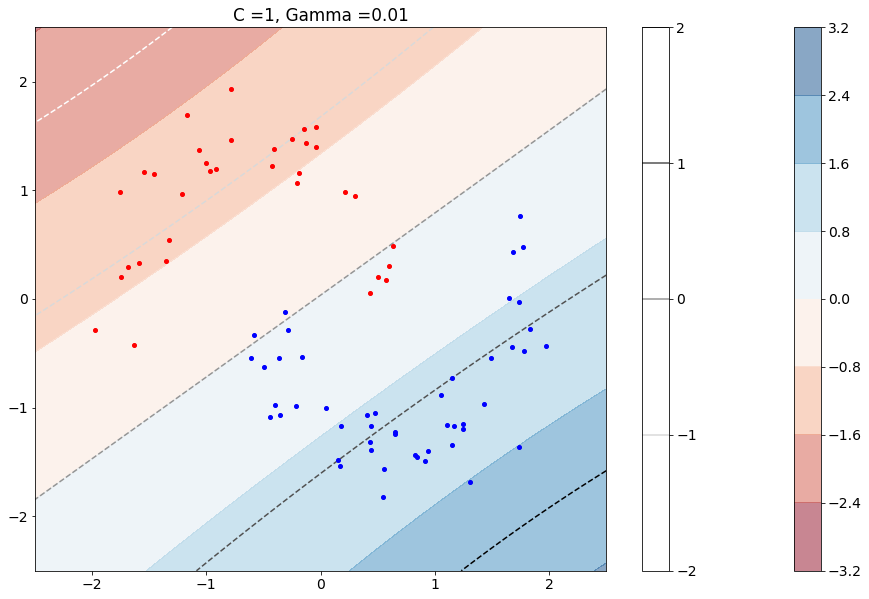

In [82]:
plotsvc(1,0.01)

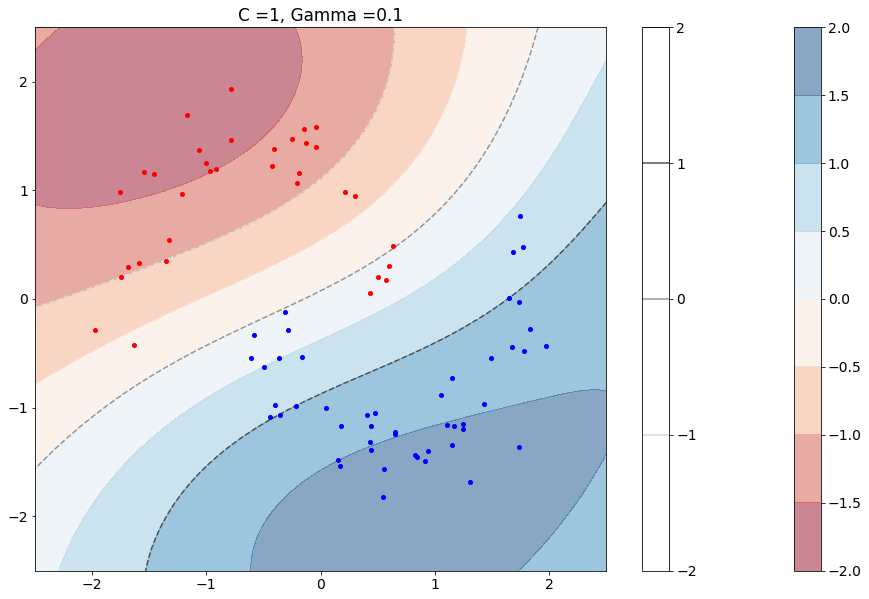

In [83]:
plotsvc(1,0.1)

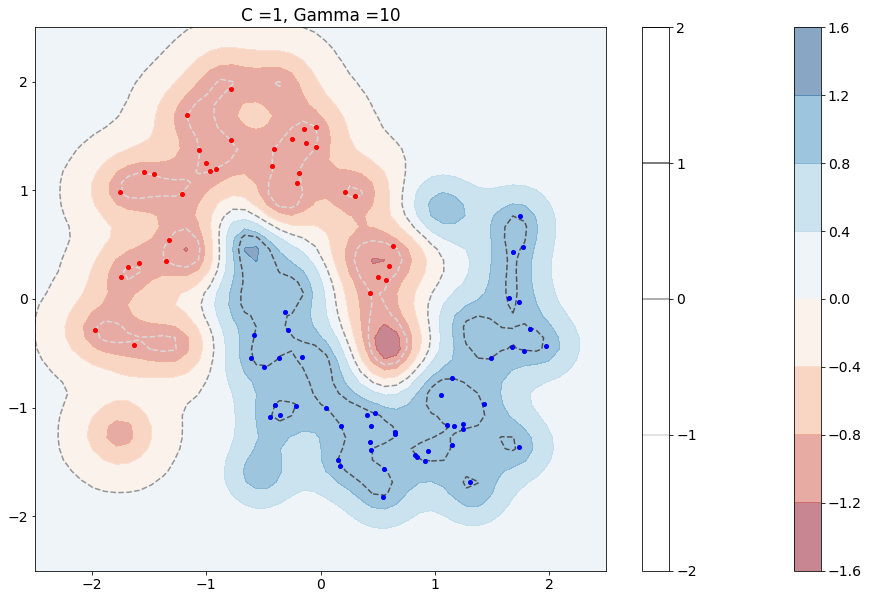

In [84]:
plotsvc(1,10)

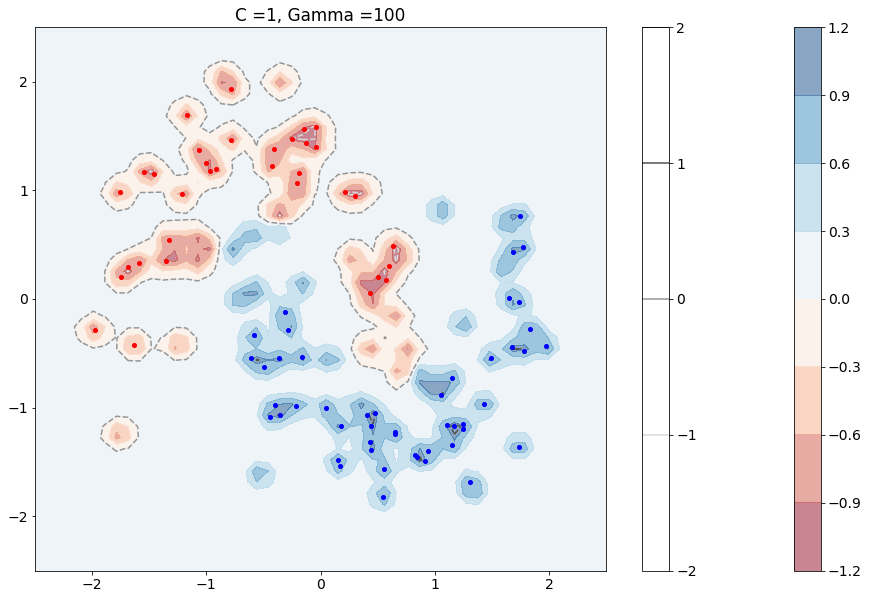

In [85]:
plotsvc(1,100)

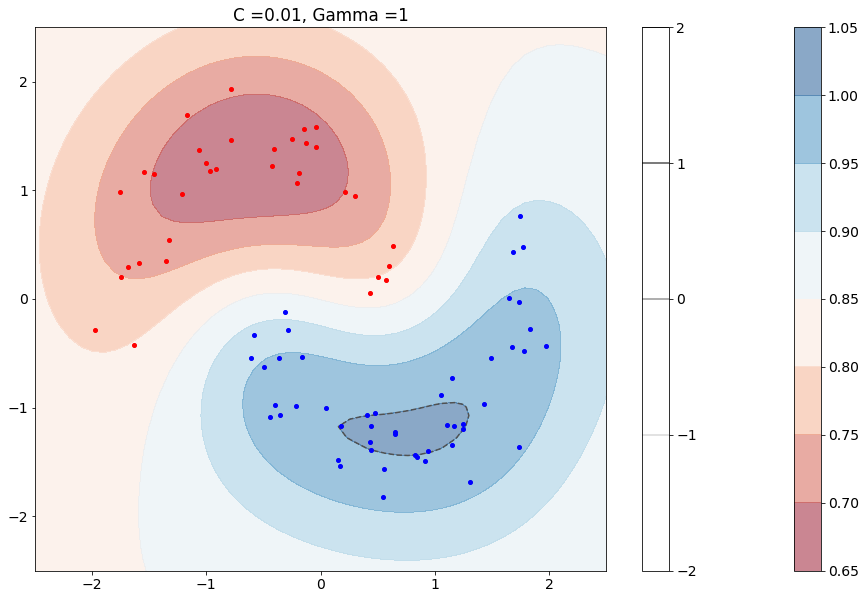

In [86]:
plotsvc(0.01,1)

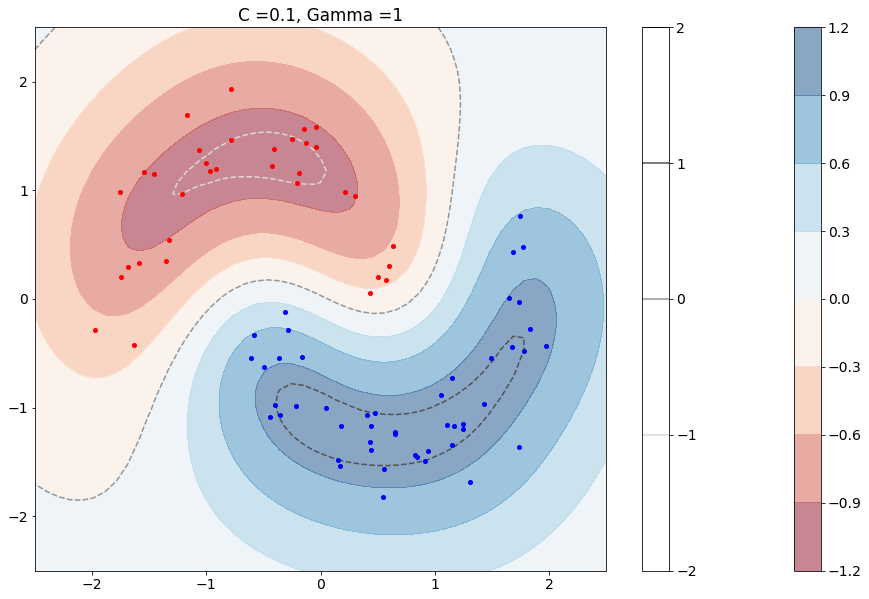

In [87]:
plotsvc(0.1,1)

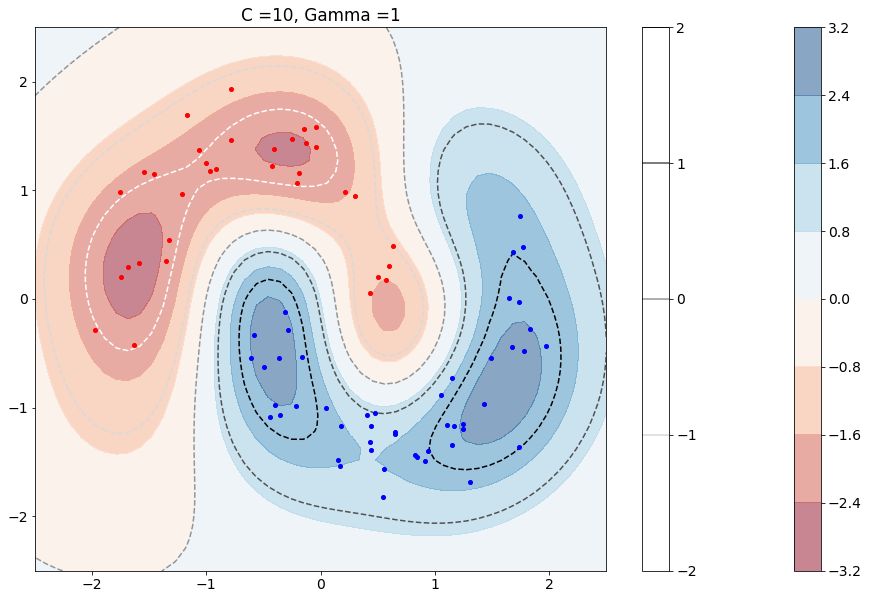

In [88]:
plotsvc(10,1)

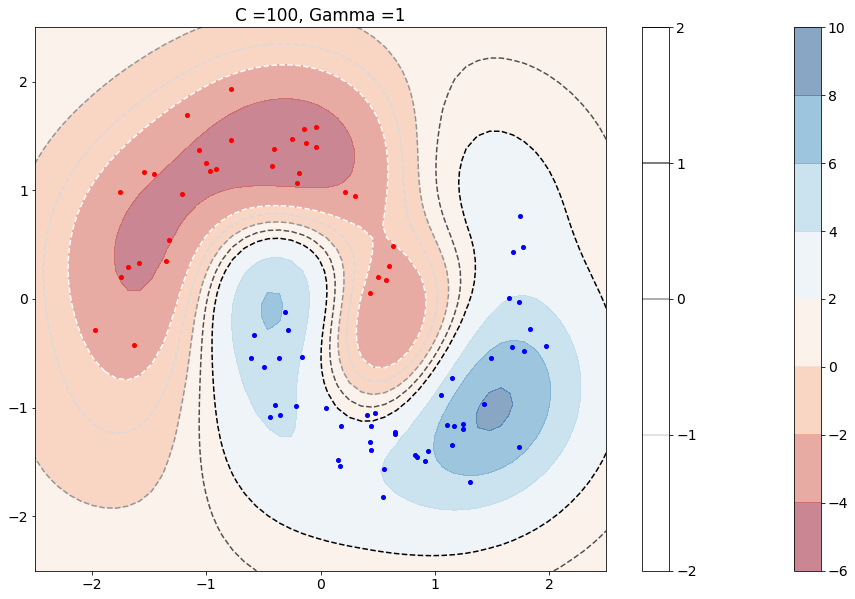

In [89]:
plotsvc(100,1)